# <p style = "font-size : 50px; color : #ffffff ; font-family : 'Comic Sans MS'; text-align : center; background-color : #000000; border-radius: 11px 11px; padding: 5px 5px">Spam Detection System</p>

In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Collection

### Loading the Spam Dataset

In [301]:
spam_df = pd.read_csv('data/spam.csv',encoding='ISO-8859-1')

### Statistical Analysis

In [302]:
spam_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [303]:
spam_df.shape

(5572, 5)

In [304]:
spam_df.nunique()

v1               2
v2            5169
Unnamed: 2      43
Unnamed: 3      10
Unnamed: 4       5
dtype: int64

In [305]:
spam_df.duplicated().sum()

403

# 2. Data Cleaning

In [306]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### Drop useless columns
**From the above analysis we can see that the last three columns near to no values in them, therefore, its better to drop them**

In [307]:
spam_df = spam_df.drop(columns = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)

In [308]:
spam_df.sample(5)

,v1,v2
2095,ham,"Probably, want to pick up more?"
1898,ham,Wat would u like 4 ur birthday?
3094,ham,Olol i printed out a forum post by a guy with ...
743,ham,Ok. There may be a free gym about.
2063,spam,"URGENT! Your mobile No *********** WON a å£2,0..."


### Renaming Columns
**Column name v1, v2 is not expressive enough, therefore, we will rename it**

In [309]:
spam_df.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [310]:
spam_df.sample(5)

,target,text
1522,ham,I thk u dun haf 2 hint in e forum already lor....
4371,spam,Ur balance is now å£600. Next question: Comple...
2170,ham,\CAN I PLEASE COME UP NOW IMIN TOWN.DONTMATTER...
4696,ham,"Okey dokey, iÛ÷ll be over in a bit just sorti..."
2621,ham,Lol! Nah wasn't too bad thanks. Its good to b ...


### Label Encoding with sklearn's LabelEncoder
**Since, the target column is in textual form, we need to convert it into numerical binary form**
* **spam = 1**
* **ham = 0**

In [311]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()

In [312]:
# Encoding
labelEncoder.fit_transform(spam_df["target"])

array([0, 0, 1, ..., 0, 0, 0])

**Replacing the textual target column with encoded target column**

In [313]:
spam_df["target"] = labelEncoder.fit_transform(spam_df["target"])

In [314]:
spam_df.sample(5)

,target,text
1812,0,\Getting tickets 4 walsall tue 6 th march. My ...
4763,0,Hi.:)technical support.providing assistance to...
5194,0,Ok... Take ur time n enjoy ur dinner...
752,0,Dont gimme that lip caveboy
1699,0,Ok...


### Missing Values
**Always check for missing values**

In [315]:
spam_df.isna().sum()

target    0
text      0
dtype: int64

**Hopefully, there are no missing values**
### Duplicate Value
**Always check for duplicate values**

In [316]:
spam_df.duplicated().sum()

403

In [317]:
spam_df.shape

(5572, 2)

**We have to deal with 403 duplicate values**
### Dealing with duplicate values
**Removing duplicate values from the dataframe**

In [318]:
# - ``first`` : Drop duplicates except for the first occurrence.
# - ``last`` : Drop duplicates except for the last occurrence.
spam_df.drop_duplicates(keep="first")

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [319]:
spam_df = spam_df.drop_duplicates(keep="first")
spam_df.shape

(5169, 2)

In [320]:
spam_df.duplicated().sum()

0

# 3. EDA
**Exploratory Data Analysis :** `This is an essential step while we are dealing with Supervised Machine learning as it helps us in understanding the data more and gain more insights on the data.`
### Data Distribution
**What percentage of our target column has ham aka 0 value & spam aka 1 value.**

In [321]:
spam_df["target"].value_counts()

0    4516
1     653
Name: target, dtype: int64

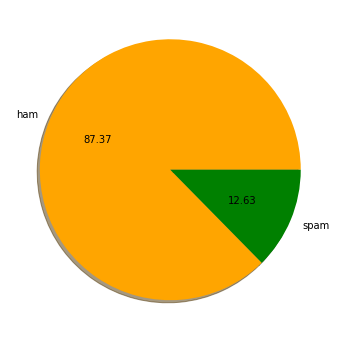

In [322]:
plt.figure(figsize=(14,6))
plt.pie(spam_df["target"].value_counts(), labels = ["ham","spam"],autopct="%.2f",shadow=True,colors = ["orange","g"])
plt.show()

**From the pie chart we can clearly see that, % of ham is 87.37 , whereas, % of spam is 12.63, hence, we can conclude that the data distribution is uneven or we can say that the data is Imbalanced**

## Feature Extraction
### Analysis of `alphabets, words, sentences` that are used in the `text` column
**For deeper analysis we'll create three separate columns & we'll achieve it via*** `nltk` **nlp library:**
1. **Number of characters in the Text**
2. **Number of words in the Text**
3. **Number of sentences in the Text**

In [323]:
import nltk

**Downloading some nltk dependencies**

In [324]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/subratamondal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [325]:
# Character count
spam_df["text"].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [326]:
# Creating Character count column
spam_df["character_count"] = spam_df["text"].apply(len)

In [327]:
spam_df.sample(5)

,target,text,character_count
5316,0,Jus finish watching tv... U?,28
424,0,Send this to ur friends and receive something ...,248
3900,0,That depends. How would you like to be treated...,50
1085,0,FR'NDSHIP is like a needle of a clock. Though ...,158
779,0,That means get the door,23


**Breaking the text into words**

In [328]:
# Extracting words with nltk.word_tokenize
spam_df["text"].apply(lambda x : nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [329]:
# Word count
spam_df["text"].apply(lambda x : len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [330]:
# Creating Word count column
spam_df["word_count"] = spam_df["text"].apply(lambda x : len(nltk.word_tokenize(x)))

In [331]:
spam_df.sample(5)

,target,text,character_count,word_count
566,0,Oooh bed ridden ey? What are YOU thinking of?,45,11
1959,0,Howz that persons story,23,4
1060,0,I'm working technical support :)voice process....,63,11
4609,0,Just glad to be talking to you.,31,8
3376,0,Yup. Wun believe wat? U really neva c e msg i ...,58,16


**Breaking the text into sentences**

In [332]:
# Extracting sentences with nltk.word_tokenize
spam_df["text"].apply(lambda x : nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [333]:
spam_df["text"].apply(lambda x : len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5169, dtype: int64

In [334]:
spam_df["sentence_count"] = spam_df["text"].apply(lambda x : len(nltk.sent_tokenize(x)))

In [335]:
spam_df.sample(5)

,target,text,character_count,word_count,sentence_count
1097,0,Don't fret. I'll buy the ovulation test strips...,160,36,4
880,1,Reminder: You have not downloaded the content ...,127,27,4
2022,1,U can WIN å£100 of Music Gift Vouchers every w...,158,23,1
1853,0,I just made some payments so dont have that mu...,98,23,3
522,0,Were gonna go get some tacos,28,7,1


In [336]:
spam_df[["character_count","word_count","sentence_count"]].describe()

,character_count,word_count,sentence_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


**Applying descriptive analysis on colums that are Not Spam i.e Ham i.e 0**

In [337]:
# Ham or Not Spam
spam_df[spam_df["target"]==0][["character_count","word_count","sentence_count"]].describe()

,character_count,word_count,sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


**Applying descriptive analysis on colums that are Spam i.e 0**

In [338]:
# Spam
spam_df[spam_df["target"]== 1][["character_count","word_count","sentence_count"]].describe()

,character_count,word_count,sentence_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


### Character count in Spam Text vs Non Spam Text

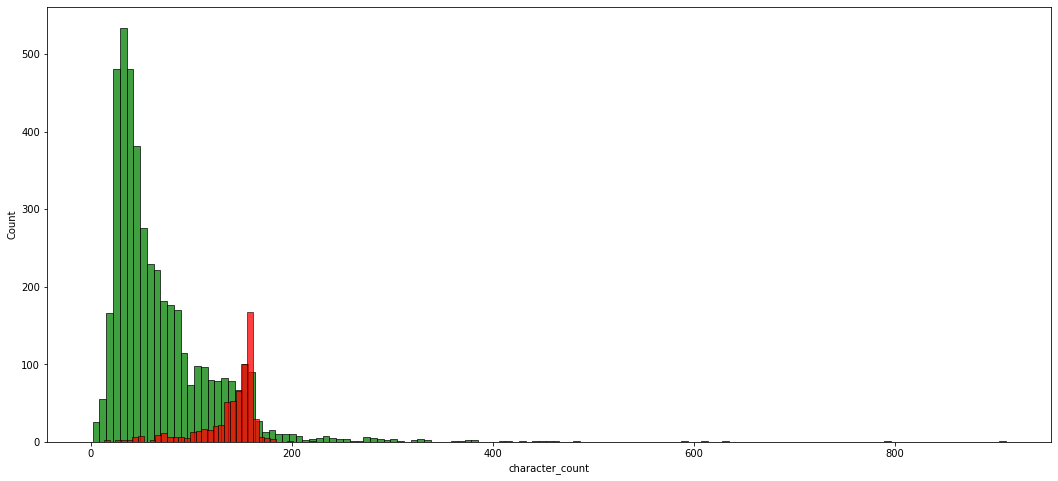

In [339]:
plt.figure(figsize=(18,8))
sns.histplot(spam_df[spam_df["target"]==0]["character_count"],color="g")
sns.histplot(spam_df[spam_df["target"]==1]["character_count"],color="r")
plt.show()

### Word count in Spam Text vs Non Spam Text

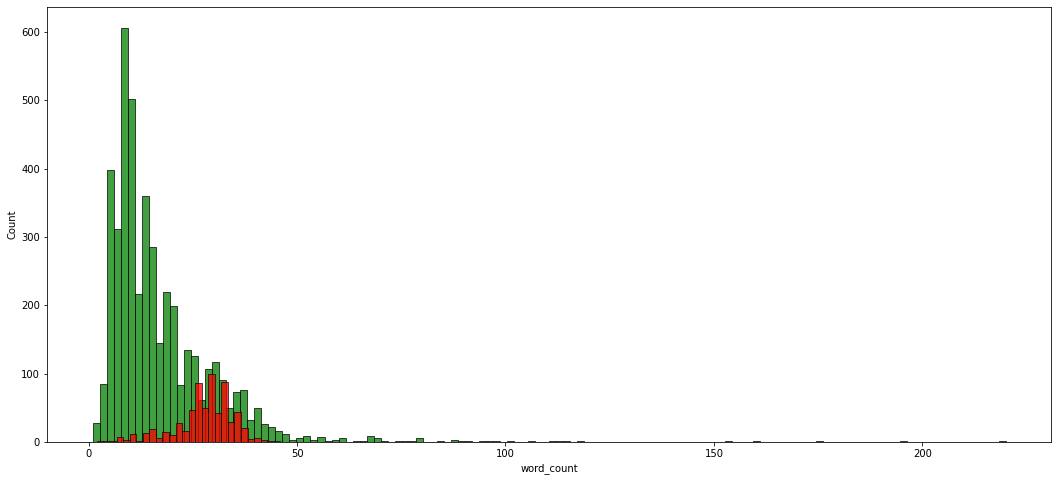

In [340]:
plt.figure(figsize=(18,8))
sns.histplot(spam_df[spam_df["target"]==0]["word_count"],color="g")
sns.histplot(spam_df[spam_df["target"]==1]["word_count"],color="r")
plt.show()

### Sentence count in Spam Text vs Non Spam Text

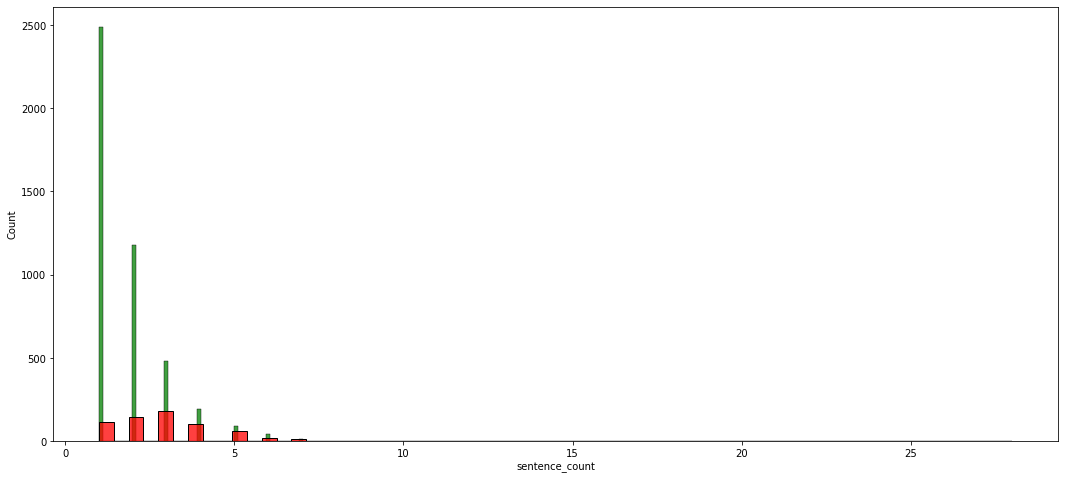

In [341]:
plt.figure(figsize=(18,8))
sns.histplot(spam_df[spam_df["target"]==0]["sentence_count"],color="g")
sns.histplot(spam_df[spam_df["target"]==1]["sentence_count"],color="r")
plt.show()

## Pairplot
**To check the relation of the columns with each other**

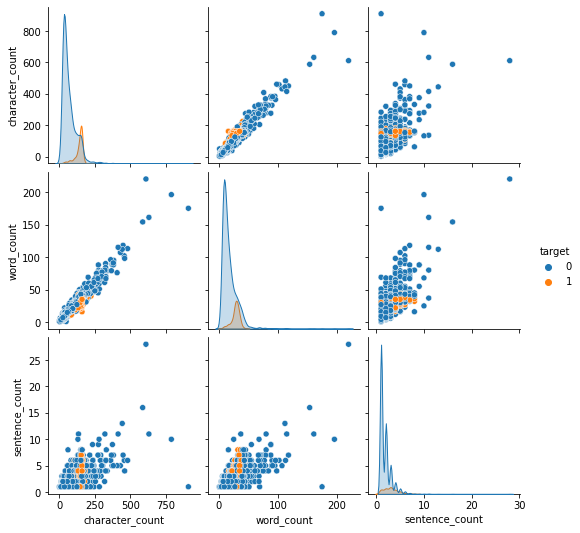

In [342]:
sns.pairplot(spam_df,hue="target")
plt.show()

**From the above plot, we can analyze that there are outliers present in the data.**
## Heatmap
**To check the correlation among the columns**

<AxesSubplot:>

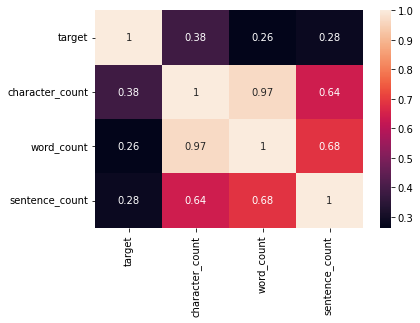

In [343]:
sns.heatmap(spam_df.corr(),annot=True)

**From the above Heatmap we analysed that character_count column has the highest correlation of 0.38 with the target column, and since there is multi-colinearity among the columns, therefore, we'll keep only the character_count column for further analysis**

# 4. Text Data Preprocessing
Steps involved are :
* **Lower Case :** `Convert the text into lower case`
* **Tokenization :** `Breaks the text into tokens or words`
* **Removing Special Characters :** `Removal of special characters`
* **Removing stop words and punctuation** `Remove stop words like 'and, if, is, are, etc' that are used for sentence formation but do not contributes to the meaning of the sentence`
* **Stemming** `Converts multiple form of one word to a single form like : from ['love','loved','loving'] to ['love','love','love']`

### Helper Function 
**To perform all the Text Data Preprocessing steps in one go**

In [344]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/subratamondal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [345]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [346]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [347]:
from nltk.stem import PorterStemmer
porterStemmer = PorterStemmer()

In [348]:
def text_preprocessing(text):
    text = text.lower() # return lowercase str | Lower Case
    text = nltk.word_tokenize(text) # returns list of tokenize words | Tokenization
    store = [] 
    
    for i in text: 
        if i.isalnum(): # Removing Special Characters
            store.append(i) # Storing only alphanumeric characters | Removing Special Characters
            
    text = store[:]
    store.clear()
    
    for i in text: 
        if i not in stopwords.words("english") and i not in string.punctuation: # Removing stop words and punctuation
            store.append(i)
            
    text = store[:]
    store.clear()
    
    for i in text:
        store.append(porterStemmer.stem(i)) # Stemming
    
    text = store
    
    return " ".join(text)

    

In [349]:
# Demo
text_preprocessing("Hey man ! it was great seeing you. The greatest moment ever")

'hey man great see greatest moment ever'

### Apllying textPreprocessing on the `text` column

In [350]:
spam_df["text"].apply(text_preprocessing)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [351]:
spam_df["transformed_text"] = spam_df["text"].apply(text_preprocessing)

In [352]:
spam_df.sample(5)

,target,text,character_count,word_count,sentence_count,transformed_text
4278,1,URGENT. Important information for 02 user. Tod...,163,32,4,urgent import inform 02 user today lucki day 2...
3160,0,Mystery solved! Just opened my email and he's ...,87,20,3,mysteri solv open email sent anoth batch sweeti
428,0,7 at esplanade.. Do Ì_ mind giving me a lift c...,69,18,1,7 esplanad mind give lift co got car today
3548,0,"I got like $ &lt;#&gt; , I can get some more l...",85,25,2,got like lt gt get later though get whatev fee...
5133,0,"Hmm... Dunno leh, mayb a bag 4 goigng out dat ...",116,29,2,hmm dunno leh mayb bag 4 goigng dat small ju a...


## Wordcloud
**Most frequent words used in a text.**

In [353]:
from wordcloud import WordCloud
wc = WordCloud(width = 1000, height = 1000, min_font_size = 10, background_color = "white")

**Wordcloud of Spam text, larger the text most frequently the word was used in the text**

In [354]:
spam_wordcloud = wc.generate(spam_df[spam_df["target"] == 1]["transformed_text"].str.cat(sep=""))

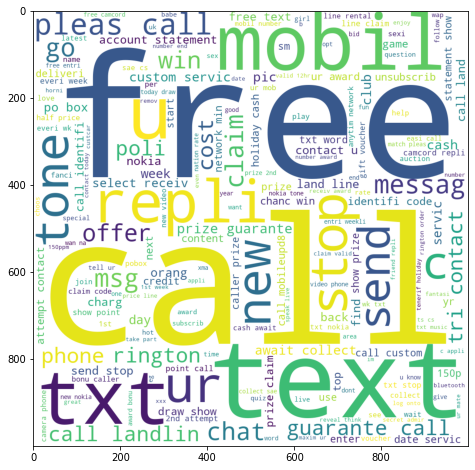

In [355]:
plt.figure(figsize=(18,8))
plt.imshow(spam_wordcloud)
plt.show()

From the above spam word cloud we can see that the words : **call, text, free, mobil, stop, send, etc are used at most in spam texts**

**Wordcloud of Not Spam text, larger the text most frequently the word was used in the text**

In [356]:
not_spam_wordcloud = wc.generate(spam_df[spam_df["target"] == 0]["transformed_text"].str.cat(sep=""))

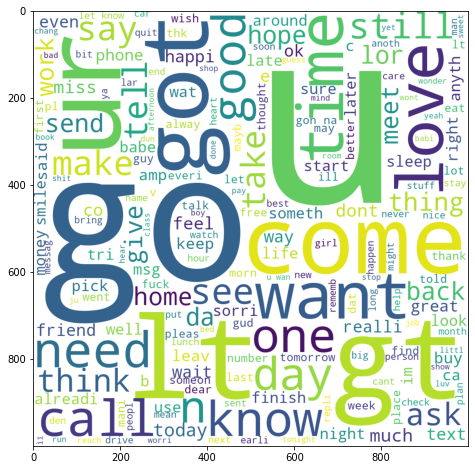

In [357]:
plt.figure(figsize=(18,8))
plt.imshow(not_spam_wordcloud)
plt.show()

From the above spam word cloud we can see that the words : **u go, time, come, good, got, thing, etc are used at most in non spam texts**

### Visualizing Top 30 Frequent Words used in Spam Text

In [358]:
# Here, each item in the converted list is a message and it is a list of strings
spam_df[spam_df["target"]==1]["transformed_text"].tolist()

def top_k_frequent_words(data,k):
    from collections import Counter
    
    word_counter = Counter()
    
    for message in data:
        for word in message.split():
            if word not in word_counter:
                word_counter[word] = 1
            else:
                word_counter[word] += 1
    return word_counter.most_common(k)
        

In [359]:
top_30_spam_words_df = top_k_frequent_words(spam_df[spam_df["target"]==1]["transformed_text"].tolist(),30)
top_30_spam_words_df = pd.DataFrame(top_30_spam_words_df,columns=["words","word_count"])
top_30_spam_words_df.head()

,words,word_count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


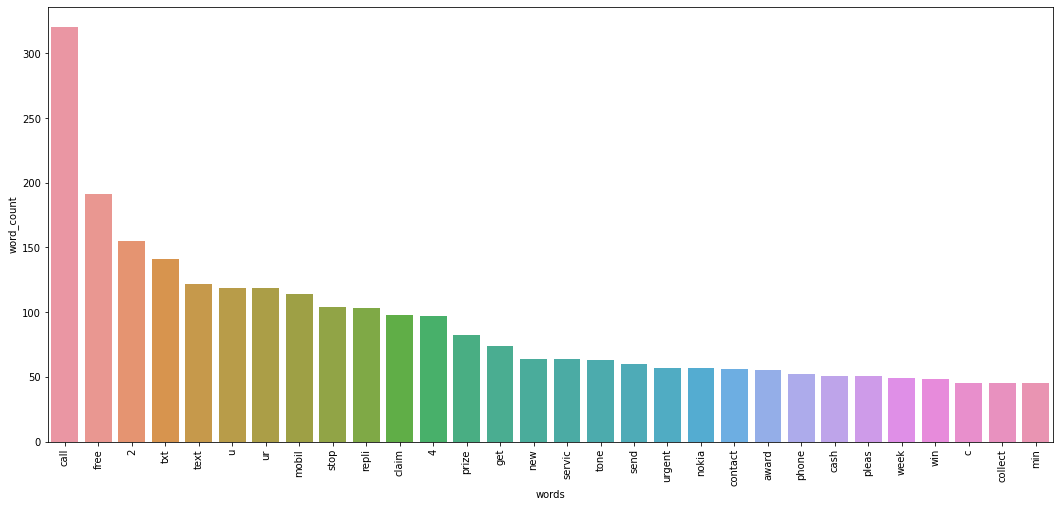

In [360]:
plt.figure(figsize=(18,8))
sns.barplot(data = top_30_spam_words_df, x = "words", y ="word_count")
plt.xticks(rotation = "90")
plt.show()

### Visualizing Top 30 Frequent Words used in Non Spam Text

In [361]:
# Here, each item in the converted list is a message and it is a list of strings
spam_df[spam_df["target"]==0]["transformed_text"].tolist()

top_30_non_spam_words = top_k_frequent_words(spam_df[spam_df["target"]==0]["transformed_text"].tolist(), 30)
top_30_non_spam_words_df = pd.DataFrame(top_30_non_spam_words, columns=["words","word_count"])
top_30_non_spam_words_df.head()

,words,word_count
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287


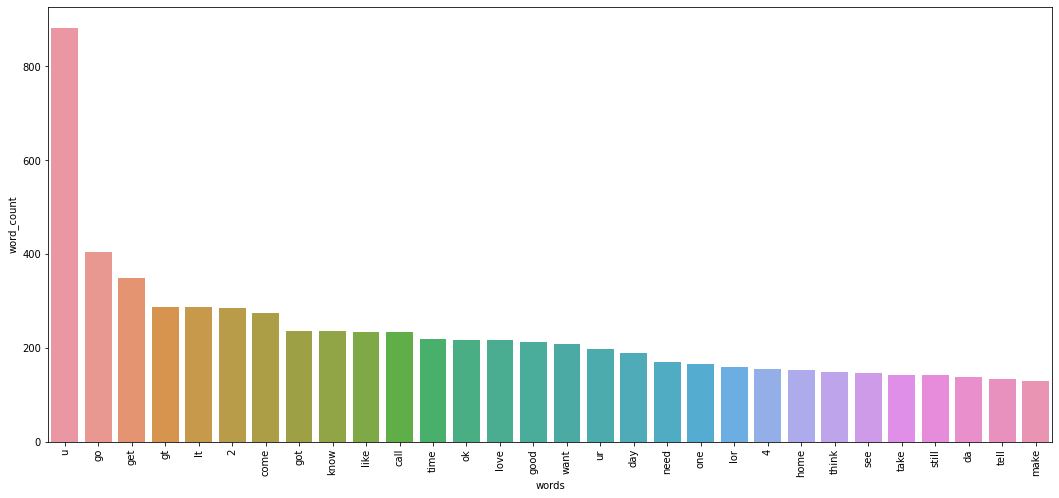

In [362]:
plt.figure(figsize=(18,8))
sns.barplot(data = top_30_non_spam_words_df, x = "words", y = "word_count")
plt.xticks(rotation = "90")
plt.show()

**Most of the words got reduced to shorter version due to applying STEMMING**

# 5. Modelling

## Vectorization
* Vectorization is jargon for a classic approach of converting input data from its raw format (i.e. text ) into vectors of real numbers which is the format that ML models support. This approach has been there ever since computers were first built, it has worked wonderfully across various domains, and it’s now used in NLP.

* In Machine Learning, vectorization is a step in feature extraction. The idea is to get some distinct features out of the text for the model to train on, by converting text to numerical vectors.

* We will aplly vectorization on `transformed_text`

**Vectorization Techniques**
### 1. Bag of Words 
Most simple of all the techniques out there. It involves three operations:
1. **Tokenization :** First, the input text is tokenized. A sentence is represented as a list of its constituent words, and it’s done for all the input sentences.

2. **Vocabulary creation :** Of all the obtained tokenized words, only unique words are selected to create the vocabulary and then sorted by alphabetical order.

3. **Vector creation :** Finally, a sparse matrix is created for the input, out of the frequency of vocabulary words. In this sparse matrix, each row is a sentence vector whose length (the columns of the matrix) is equal to the size of the vocabulary.

### 2. Normalized TF-IDF

### 3. Word2Vec


In [363]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
countVectorizer = CountVectorizer()
tfidVectorizer = TfidfVectorizer(max_features=3000)

#### Using Normalized TF-IDF

In [364]:
X = tfidVectorizer.fit_transform(spam_df["transformed_text"]).toarray()
X.shape #(text sms, words)

(5169, 3000)

In [365]:
y = spam_df["target"].values
y

array([0, 0, 1, ..., 0, 0, 0])

**Since, its a known fact that on textual data Naive Bayes Algorithm gives better result, so we will use it first**

## Naive Bayes Modelling

In [366]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

#### Importing all the Naive Bayes Algorithm, since we don't know the Data Distribution

In [367]:
# Importing all the Naive Bayes Algorithm, since we don't know the Data Distribution
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
gaussianNB = GaussianNB()
bernoulliNB = BernoulliNB()
multinomialNB = MultinomialNB()

### 1. Modelling with GaussianNB

In [368]:
# Train
gaussianNB.fit(X_train, y_train)

# Test
y_pred = gaussianNB.predict(X_test)

# Evaluation
accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)
precision_score(y_test, y_pred)

print(f"Accuracy Score of GaussianNB is :\n{accuracy_score(y_test, y_pred)}\n")
print(f"Confusion Matrix of GaussianNB is :\n{confusion_matrix(y_test, y_pred)}\n")
print(f"Precision Score of GaussianNB is :\n{precision_score(y_test, y_pred)}")

Accuracy Score of GaussianNB is :
0.8694390715667312

Confusion Matrix of GaussianNB is :
[[788 108]
 [ 27 111]]

Precision Score of GaussianNB is :
0.5068493150684932


### Modelling with BernoulliNB

In [369]:
# Train
bernoulliNB.fit(X_train, y_train)

# Test
y_pred = bernoulliNB.predict(X_test)

# Evaluation
accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)
precision_score(y_test, y_pred)

print(f"Accuracy Score of BernoulliNB is :\n{accuracy_score(y_test, y_pred)}\n")
print(f"Confusion Matrix of BernoulliNB is :\n{confusion_matrix(y_test, y_pred)}\n")
print(f"Precision Score of BernoulliNB is :\n{precision_score(y_test, y_pred)}")

modelPerformance["BernoulliNB Accuracy Score"] = [accuracy_score(y_test, y_pred)]
modelPerformance["BernoulliNB Precision Score"] = [precision_score(y_test, y_pred)]

Accuracy Score of BernoulliNB is :
0.9835589941972921

Confusion Matrix of BernoulliNB is :
[[895   1]
 [ 16 122]]

Precision Score of BernoulliNB is :
0.991869918699187


### Modelling with MultinomialNB

In [370]:
# Train
multinomialNB.fit(X_train, y_train)

# Test
y_pred = multinomialNB.predict(X_test)

# Evaluation
accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)
precision_score(y_test, y_pred)

print(f"Accuracy Score of MultinomialNB is :\n{accuracy_score(y_test, y_pred)}\n")
print(f"Confusion Matrix of MultinomialNB is :\n{confusion_matrix(y_test, y_pred)}\n")
print(f"Precision Score of MultinomialNB is :\n{precision_score(y_test, y_pred)}")

modelPerformance["MultinomialNB Accuracy Score"] = [accuracy_score(y_test, y_pred)]
modelPerformance["MultinomialNB Precision Score"] = [precision_score(y_test, y_pred)]

Accuracy Score of MultinomialNB is :
0.9709864603481625

Confusion Matrix of MultinomialNB is :
[[896   0]
 [ 30 108]]

Precision Score of MultinomialNB is :
1.0


**Since, our data is Imbalanced, therefore, Precision Score matters the most , even more than Accuracy Score and we can see that Precision Score of MultinomialNB Naive Bayes is the best among the three, therefore, we will move forward with the MultinomialNB Model**

**After Tuning TfidfVectorizer(max_features=3000) from default to 3000, the Accuracy of MultinomialNB increased from 0.95 to 0.97 and the precision score was already 1.0**


In [371]:
pd.DataFrame({"Accuracy Score Before": 0.95,
    "Precision Score Before":1.0, 
    "Accuracy Score Now":0.97, 
    "Precision Score Now": 1.0
             },index = ["Multinomial NB"])

,Accuracy Score Before,Precision Score Before,Accuracy Score Now,Precision Score Now
Multinomial NB,0.95,1.0,0.97,1.0


### Creating Pickle files to use them in the Web App


In [372]:
import pickle
pickle.dump(tfidVectorizer, open("tfidfVectorizer.pkl", "wb"))
pickle.dump(multinomialNB, open("multinomialNB.pkl","wb"))

In [373]:
tfidVectorizer

TfidfVectorizer(max_features=3000)

In [374]:
multinomialNB

MultinomialNB()

# 6. Model Improvement

# 7. Model Improvements

# 8. Website Creation

# 9. Deployment